## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [121]:
DataSet=pd.read_csv('arruela_.csv')

In [122]:
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,17:56:39,53,25,69,81,68,1,0
1,17:56:41,53,26,89,87,56,1,0
2,17:56:52,53,27,68,69,55,1,0
3,17:56:55,53,28,36,50,80,1,0
4,17:56:58,53,29,71,72,50,1,0


In [123]:
DataSet.drop(['Hora','Tamanho','Referencia'],axis=1,inplace=True)
#Aqui vamos descartar as colunas Hora, Tamanho e Referencia que são utilizadas somente para fim de análise

In [124]:
DataSet.head()  #Pré-visualização do DataSet

,NumAmostra,Area,Delta,Output1,Output2
0,69,81,68,1,0
1,89,87,56,1,0
2,68,69,55,1,0
3,36,50,80,1,0
4,71,72,50,1,0


In [125]:
DataSet.describe()  #Informações sobre os dados

,NumAmostra,Area,Delta,Output1,Output2
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,59.777778,63.697318,54.747126,0.375479,0.624521
std,17.293075,30.629366,35.548413,0.485177,0.485177
min,3.000000,6.000000,17.000000,0.000000,0.000000
25%,50.000000,46.000000,38.000000,0.000000,0.000000
50%,59.000000,56.000000,44.000000,0.000000,1.000000
75%,69.000000,68.000000,54.000000,1.000000,1.000000
max,120.000000,201.000000,251.000000,1.000000,1.000000


### Váriaveis do *Dataset*

In [126]:
DataSet.columns # mostra as colunas do DataSet

Index(['NumAmostra', 'Area', 'Delta', 'Output1', 'Output2'], dtype='object')

### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

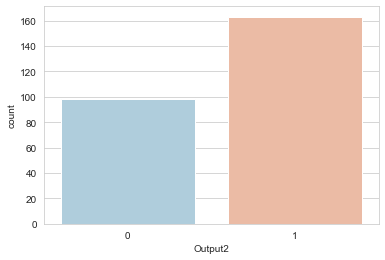

In [127]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

# Aqui temos as 2 saidas da rede neural
# A saida 0 significa que uma peça passou pelo sensor 
# A saida 1 significa que 2 peças passaram pelo sensor ao mesmo tempo

#### Gráfico da distribuição das áreas das peças

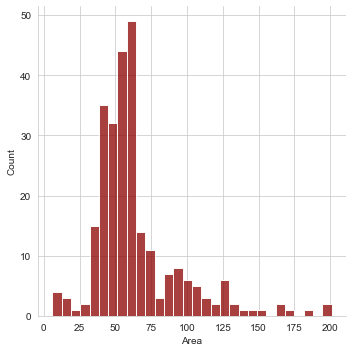

In [128]:
sns.displot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

#Aqui vemos a distribuição dos dados, nesse caso a área medida

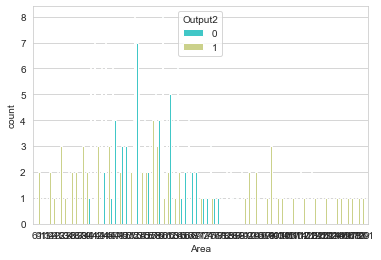

In [129]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

#Aqui vemos a distribuição dos dados, nesse caso como a área influencia na saida

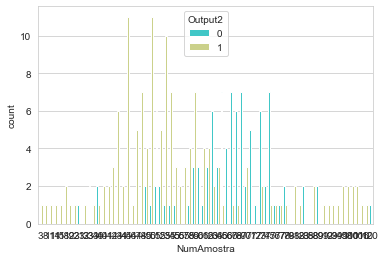

In [130]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()
#Aqui vemos a distribuição dos dados, nesse caso como número de amostras influencia na saida

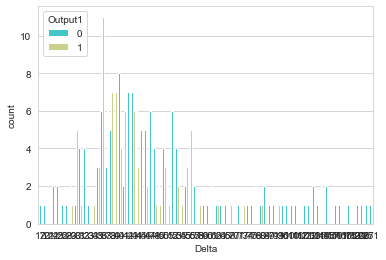

In [131]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()
#Aqui vemos a distribuição dos dados, nesse caso como o cálculo do delta influencia na saida

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [132]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

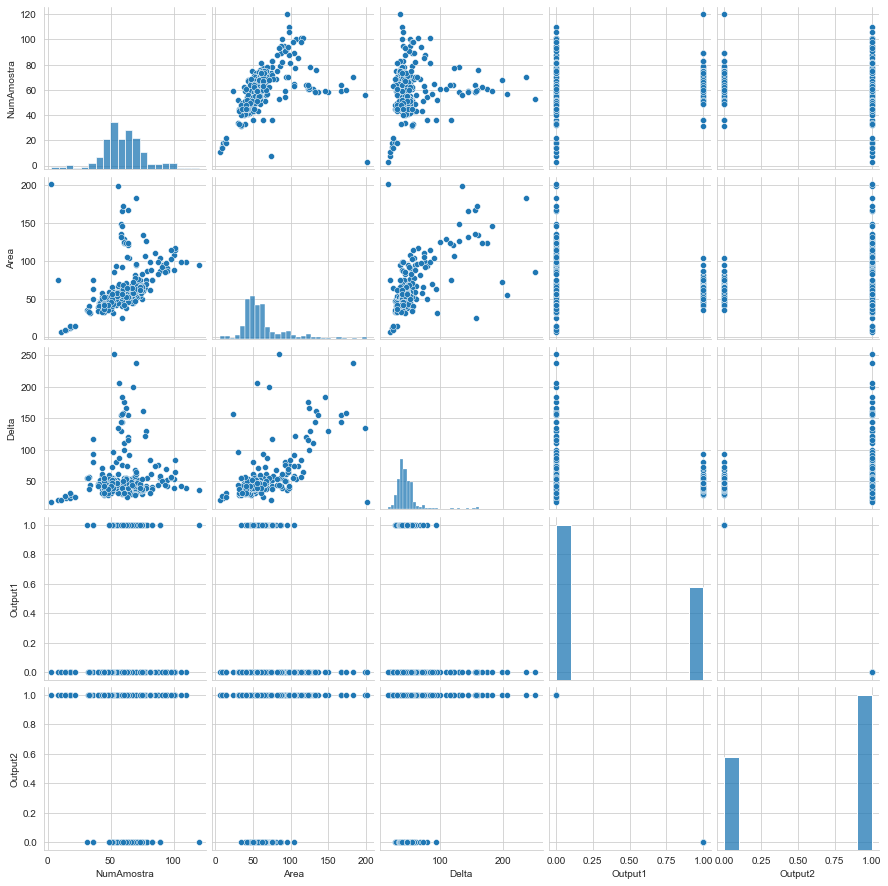

In [133]:
sns.pairplot(DataSet)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

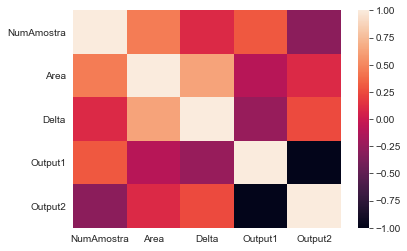

In [134]:
sns.heatmap(DataSet.corr())
plt.show()

## Normalização dos Dados

In [135]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
DataScaled=scaler.fit_transform(DataSet)
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['NumAmostra', 'Area', 'Delta', 'Output1','Output2'])

#Aqui normalizamos os dados, ou seja, todos os valores ficarão entre 0 e 1 com os mesmos pesos antes da normalização

In [136]:
DataSetScaled.head()

,NumAmostra,Area,Delta,Output1,Output2
0,0.128205,-0.230769,-0.564103,1.0,-1.0
1,0.470085,-0.169231,-0.666667,1.0,-1.0
2,0.111111,-0.353846,-0.675214,1.0,-1.0
3,-0.435897,-0.548718,-0.461538,1.0,-1.0
4,0.162393,-0.323077,-0.717949,1.0,-1.0


### Conjunto de dados para o treinamento

In [137]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

print(y_test)
print(X_test)

     Output1  Output2
89         1        0
212        0        1
218        0        1
96         1        0
88         1        0
..       ...      ...
22         1        0
42         1        0
160        0        1
93         1        0
50         1        0

[79 rows x 2 columns]
     NumAmostra      Area     Delta
89     0.111111 -0.466667 -0.777778
212   -0.282051 -0.733333 -0.897436
218    0.333333 -0.435897 -0.880342
96    -0.521368 -0.702564 -0.675214
88    -0.059829 -0.538462 -0.820513
..          ...       ...       ...
22     0.128205 -0.487179 -0.837607
42     0.128205 -0.446154 -0.829060
160    0.623932 -0.005128 -0.666667
93     0.008547 -0.405128 -0.666667
50     0.076923 -0.425641 -0.794872

[79 rows x 3 columns]


## Criando o Modelo de MPL

In [139]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 8
N_output = 2
learnrate = 0.1

## Inicialização dos pesos da MPL (Aleatório)

In [140]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[-0.01106937 -0.00358866  0.11511542  0.02782833  0.00755842  0.15116226
   0.06637477  0.02371823]
 [-0.01579896 -0.06934986  0.05996781  0.06242664 -0.02957415  0.04867383
  -0.07128703  0.10540468]
 [-0.05116822 -0.08360944 -0.22658572 -0.01679641 -0.01375096  0.06399588
   0.02052164  0.12946953]]
Pesos da Camada de Saída:
[[-0.09413695  0.10062282]
 [-0.11809056 -0.01151607]
 [-0.04561333 -0.11933917]
 [ 0.08023449  0.14628378]
 [ 0.06087396 -0.08012877]
 [-0.01725515 -0.06901347]
 [ 0.28803549 -0.1585984 ]
 [-0.10240756  0.12646438]]


## Algoritmo Backpropagation

In [141]:
epochs = 30000
last_loss=None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        error = yi - output
    
        output_error_term = error * output * (1 - output)

        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  0.24321515432786306
Erro quadrático no treinamento:  0.3892588816829775  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.37965701345579994
Erro quadrático no treinamento:  0.34813034622997735
Erro quadrático no treinamento:  0.29649711255827216
Erro quadrático no treinamento:  0.24640411363982295
Erro quadrático no treinamento:  0.20699127457459904
Erro quadrático no treinamento:  0.17725363160648383
Erro quadrático no treinamento:  0.15502374513844053
Erro quadrático no treinamento:  0.13852400224376057
Erro quadrático no treinamento:  0.1263323286635334
Erro quadrático no treinamento:  0.11735816101064057
Erro quadrático no treinamento:  0.11080993778775197
Erro quadrático no treinamento:  0.10613024091010015
Erro quadrático no treinamento:  0.10289969972577281
Erro quadrático no treinamento:  0.10065075361225392
Erro quadrático no treinamento:  0.09838460859738275
Erro quadrático no treinamento:  0.09372590622084125
Erro quadrático

In [142]:
### Gráfico da Evolução do Erro

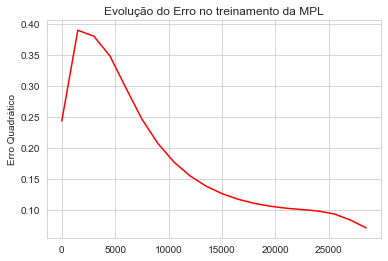

In [143]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

## Validação do modelo

In [144]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
predictions=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)

#-------------------------------------------    
    
#Cálculo do Erro da Predição
        ## TODO: Cálculo do Erro        
        if (output[0]>output[1]):
            if (yi[0]>yi[1]):
                predictions+=1
                
        if (output[1]>=output[0]):
            if (yi[1]>yi[0]):
                predictions+=1

print("A Acurácia da Predição é de: {:.3f}".format(predictions/n_records))
 


A Acurácia da Predição é de: 0.823
